# Real-Time Data: COVID-19 Outbreak behaviour Vs Government Measures.
#The Data produced from the Data source Johns Hopkins 

Create dataframes from source data
    Hopkins
    Italy
    Etc..
Plot source data
Calculate descriptive dataframes
    early_countries = Earliest epidemic start (country_name,date,number) sorted by date and stored in dataframe
    early1k_countries = Earliest 1000 cases (country_name,date,number)
    early_highrate = Earliest highest rate (what date was the highest rate for each country) 
    etc...
Plot descriptive data

# 1a. Import of Libraries for Data manipulation

In [326]:
# -*- coding: utf-8 -*-
"""
Plot rates of changes per day and per country froo the COVID epidemic
Created on Thu Apr 23 00:03:57 2020
@author: Muhibu
"""
## Importing Pandas Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import figure #figure(num=None, figsize=(8, 6))
from numpy.polynomial import Legendre as L

# 1b. Raw data loading, cleaning and visualization

# i. Death cases

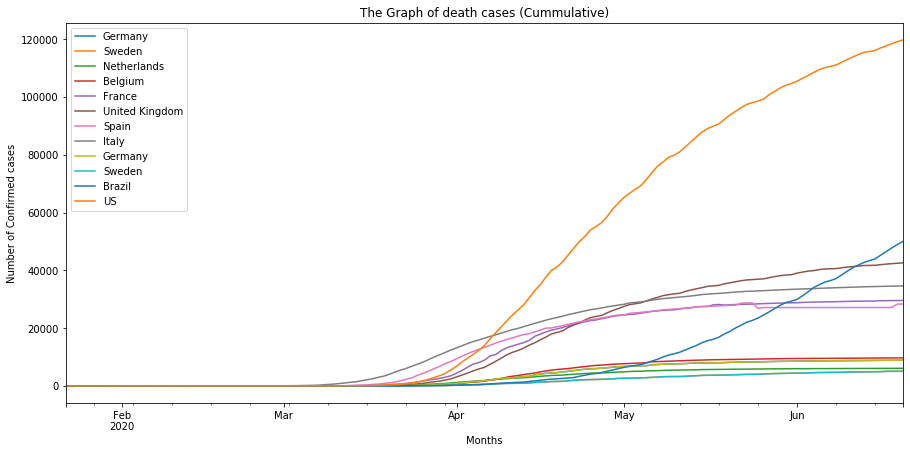

In [327]:
#Importing data for death cases: Source Johns Hopkins data from the shared platform: github

covid=pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')

# =========Convert data into a dataframe with dates as index and countries/province as column names
dfd=covid.T # transpose covbid dataframe into df dataframe
countries=list(covid['Country/Region']) # create a list 'countries' of countries from the column 'Country/Region' in covid
province=list(covid['Province/State']) # create a list of 'province' from the column 'Province/State' in covid
colnamesD= [i if str(j)=='nan' else i+'/'+j  for i, j in zip(countries, province)] # create a list by concatenating countries names and "/" and province names
dfd.columns= colnamesD # Set new column names to df dataframe
dfd=dfd.drop(dfd.index[[0,1,2,3]]) # remove the first 4 lines of df with country, province, lat,long
dfd.index=pd.to_datetime(dfd.index, format='%m/%d/%y') # set new index with date as datetime64[ns] format

#Selected countries
mcountries=['Germany','Sweden', 'Netherlands','Belgium','France','United Kingdom',
            'Spain','Italy', 'Germany','Sweden','Brazil','US']

#Plot graph of death cases for selected countries
dfd[mcountries].plot(legend=True,figsize=(15,7))
plt.title('The Graph of death cases (Cummulative)')
plt.xlabel('Months')
plt.ylabel('Number of Confirmed cases')

## TO save the figure as jpg
plt.savefig("dfd.jpg")

# ii. Confirmed cases

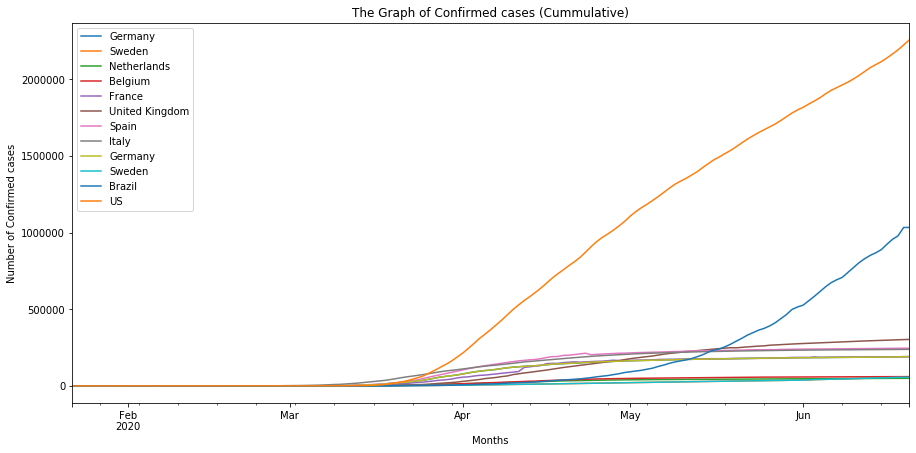

In [328]:
#Importing data for Confirmed cases: Source Johns Hopkins data from the shared platform: github
covid=pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')

# =========Convert data into a dataframe with dates as index and countries/province as column names

dfc=covid.T # transpose covid dataframe into df dataframe
countries=list(covid['Country/Region']) # create a list 'countries' of countries from the column 'Country/Region' in covid
province=list(covid['Province/State']) # create a list of 'province' from the column 'Province/State' in covid
colnamesC= [i if str(j)=='nan' else i+'/'+j  for i, j in zip(countries, province)] # create a list by concatenating countries names and "/" and province names
dfc.columns= colnamesC # Set new column names to df dataframe
dfc=dfc.drop(dfc.index[[0,1,2,3]]) # remove the first 4 lines of df with country, province, lat,long
dfc.index=pd.to_datetime(dfd.index, format='%m/%d/%y') # set new index with date as datetime64[ns] format

#Plot graph of confirmed cases for selected countries
dfc[mcountries].plot(legend=True,figsize=(15,7))
plt.title('The Graph of Confirmed cases (Cummulative)')
plt.xlabel('Months')
plt.ylabel('Number of Confirmed cases')


## TO save the figure as jpg
plt.savefig("dfc.jpg")

# iii. Recovery cases

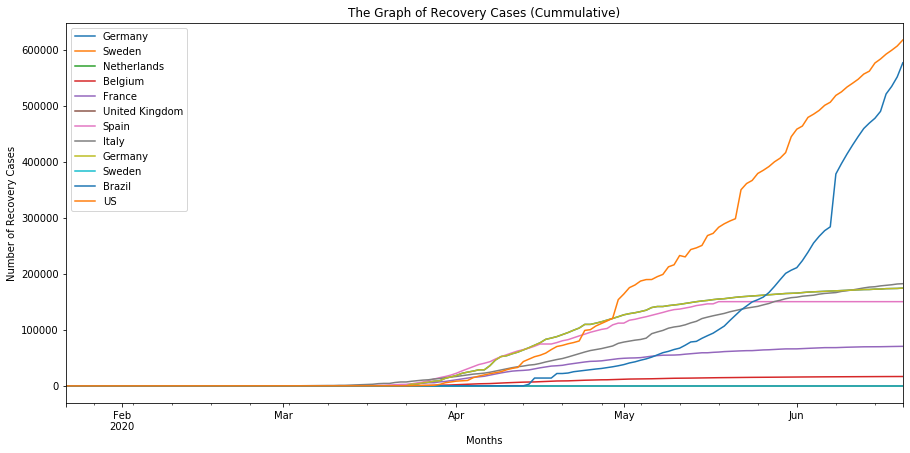

In [329]:
#Importing data for recovery cases: Source Johns Hopkins data from the shared platform: github
covid=pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')


# =========Convert data into a dataframe with dates as index and countries/province as column names

dfr=covid.T # transpose covid dataframe into df dataframe
countries=list(covid['Country/Region']) # create a list 'countries' of countries from the column 'Country/Region' in covid
province=list(covid['Province/State']) # create a list of 'province' from the column 'Province/State' in covid
colnamesR= [i if str(j)=='nan' else i+'/'+j  for i, j in zip(countries, province)] # create a list by concatenating countries names and "/" and province names
dfr.columns= colnamesR # Set new column names to df dataframe
dfr=dfr.drop(dfr.index[[0,1,2,3]]) # remove the first 4 lines of df with country, province, lat,long
dfr.index=pd.to_datetime(dfd.index, format='%m/%d/%y') # set new index with date as datetime64[ns] format

##Plot dfr of selected countries
dfr[mcountries].plot(figsize=(15,7))
plt.title('The Graph of Recovery Cases (Cummulative)')
plt.legend(loc='upper left')
plt.xlabel('Months')
plt.ylabel('Number of Recovery Cases')

## TO save the figure as jpg
plt.savefig("dfr.jpg")

# 3. Visualization of cases per day (daily cases)

# a. Daily death cases for the whole selected countries

In [330]:

#Creating group of countries with similar dynamics
grp1 = ['Germany','Sweden', 'Netherlands','Belgium']
grp2 = ['France','United Kingdom', 'Spain','Italy']
grp4 = ['Brazil','US']

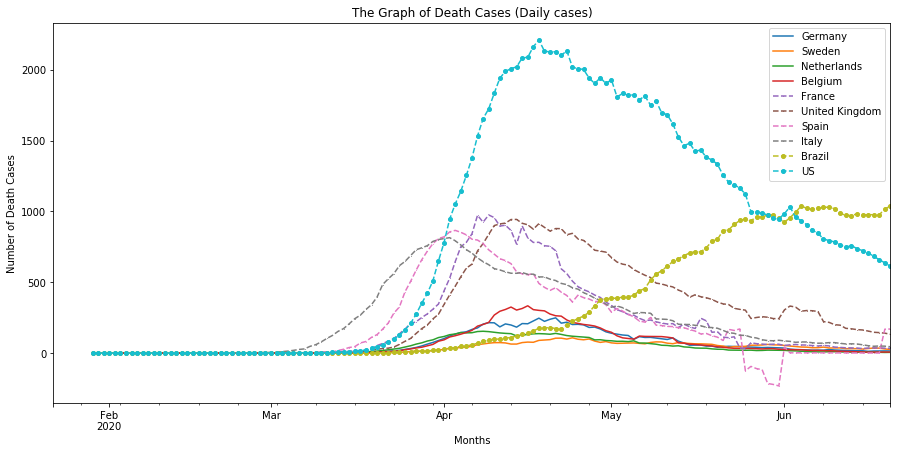

In [335]:
## Create daily data
dfd_nc = dfd.diff() # dfd_nc: none cummulative dfd data i.e. daily data

#Smoothing by Weighted moing average "rolling"
dfd_r= dfd_nc.rolling(window=7) # r: weighted mean (rolling)
dfd_rm = dfd_r.mean() # rolling mean

#Plotting
ax = dfd_rm[grp1].plot(legend=True,figsize=(15,7))
dfd_rm[grp2].plot(ax=ax, linestyle='dashed', marker='3', markersize=0.5)
dfd_rm[grp4].plot(ax=ax, linestyle='dashed', marker='o', markersize=4)

plt.title('The Graph of Death Cases (Daily cases)')
plt.xlabel('Months')
plt.ylabel('Number of Death Cases')

## to save the figure as jpg
plt.savefig("dfd_nc.jpg")


# b. Daily death cases per group of countries

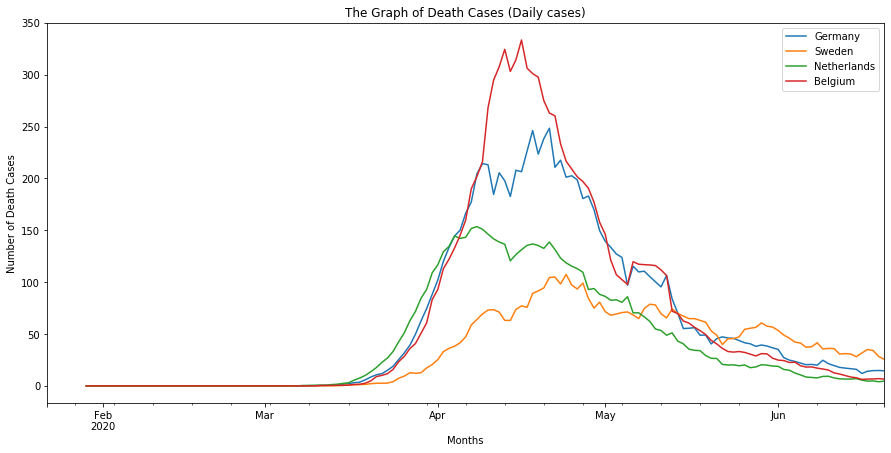

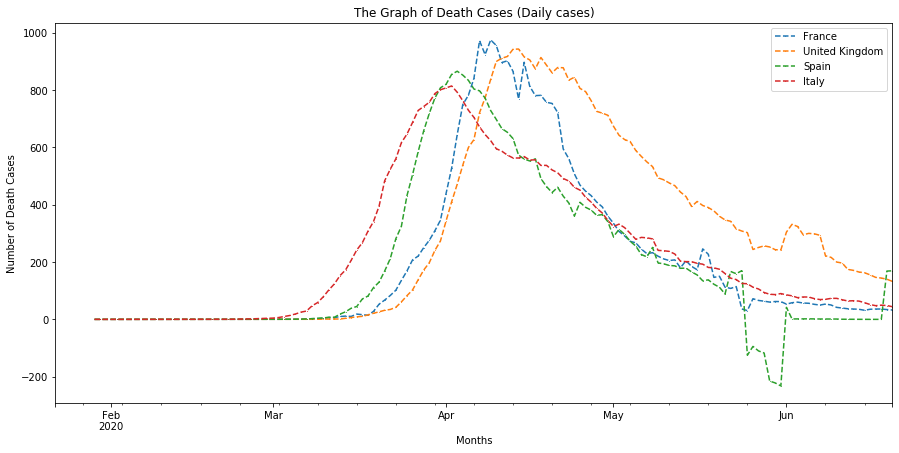

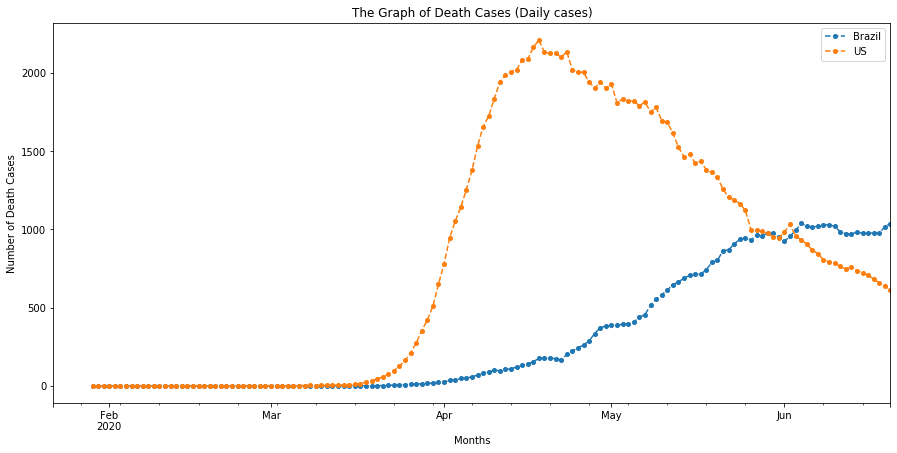

In [336]:
## Create daily data
dfd_nc = dfd.diff() # dfd_d: none cummulative /daily data

#Smoothing by Weighted moing average "rolling"
dfd_r= dfd_nc.rolling(window=7) # r: weighted mean (rolling)
dfd_rm = dfd_r.mean() # rolling mean

#Plotting
dfd_rm[grp1].plot(legend=True,figsize=(15,7))
plt.title('The Graph of Death Cases (Daily cases)')
plt.xlabel('Months')
plt.ylabel('Number of Death Cases')
#save the figure as jpg
plt.savefig("dfd_ncgrp1.jpg")

dfd_rm[grp2].plot(legend=True,  linestyle='dashed', marker='3', markersize=0.5,figsize=(15,7))
plt.title('The Graph of Death Cases (Daily cases)')
plt.xlabel('Months')
plt.ylabel('Number of Death Cases')
#save the figure as jpg
plt.savefig("dfd_ncgrp2.jpg")

dfd_rm[grp4].plot(legend=True, linestyle='dashed', marker='o', markersize=4,figsize=(15,7))
plt.title('The Graph of Death Cases (Daily cases)')
plt.xlabel('Months')
plt.ylabel('Number of Death Cases')
#save the figure as jpg
plt.savefig("dfd_ncgrp4.jpg")



# 4.Cases per number of days

# a. Death cases per N° of days for the selected countries 

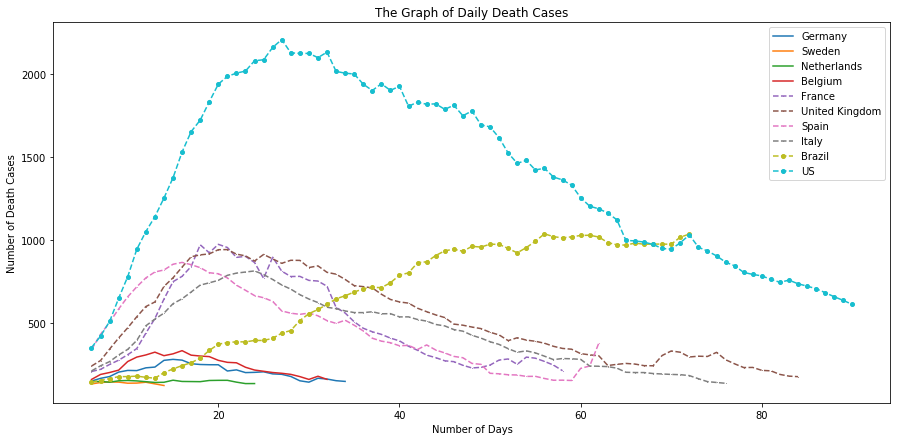

In [337]:
## Create daily data
dfd_nc = dfd.diff() # dfd_nc: none cummulative dfd data i.e. daily data

dfd_s=pd.DataFrame(index=range(0,len(dfd_nc.index)))## Dataframe of daily cases
#Looping
for x in colnamesD:
    v=pd.DataFrame(dfd_nc[x][dfd_nc[x] > 100].values, dtype = int) # selct values above zero
    # create a dataframe with one columnn named A with of length
    dfnan=pd.DataFrame(index=range(0,len(dfd_nc.index)-len(v)),columns=['A'], dtype='float')    
    dfd_s[x]=list(pd.concat([v, dfnan])[0]) 

#Smoothing by Weighted moing average "rolling"
dfd_r= dfd_s.rolling(window=7) # r: weighted mean (rolling)
dfd_rm = dfd_r.mean() # rolling mean

#Plotting
ax = dfd_rm[grp1].plot(legend=True,figsize=(15,7))
dfd_rm[grp2].plot(ax=ax, linestyle='dashed', marker='3', markersize=0.5)
dfd_rm[grp4].plot(ax=ax, linestyle='dashed', marker='o', markersize=4)

plt.title('The Graph of Daily Death Cases')
plt.xlabel('Number of Days')
plt.ylabel('Number of Death Cases')

## TO save the figure as jpg
plt.savefig("dfd_s.jpg")

# b. Death cases per N° of days per group of countries 

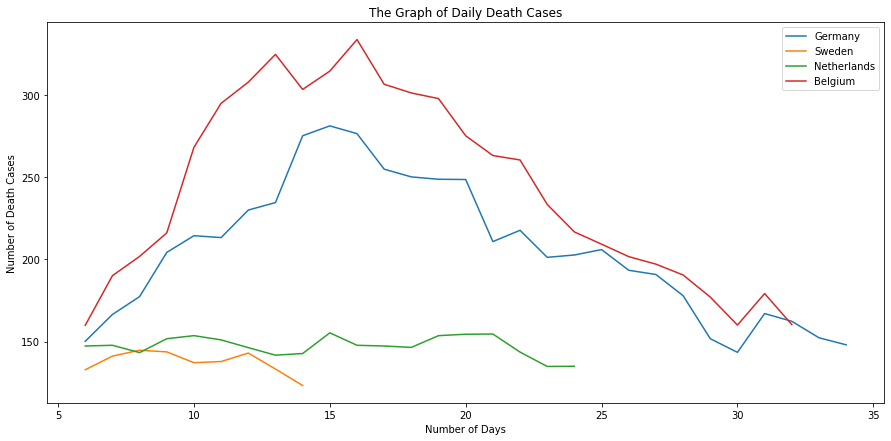

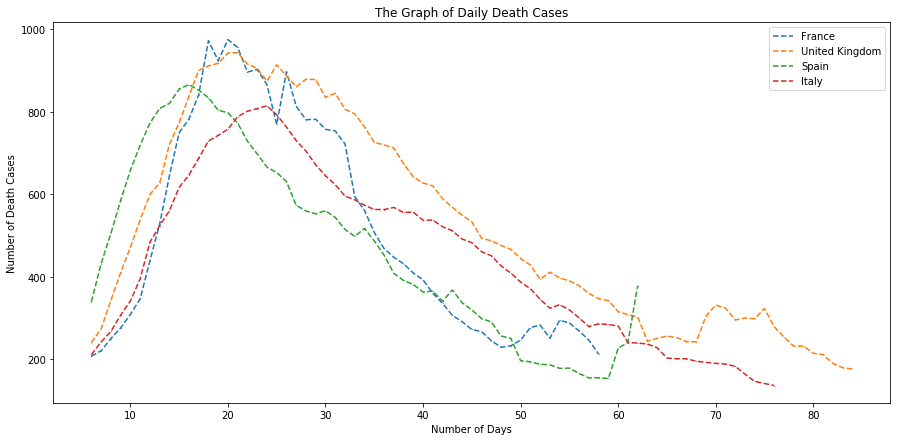

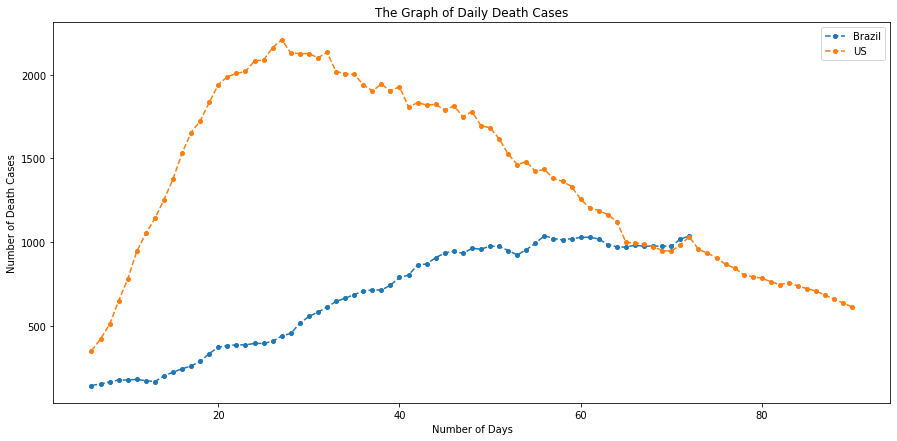

In [338]:
## Create daily data
dfd_nc = dfd.diff() # dfd_nc: none cummulative dfd data i.e. daily data

dfd_s=pd.DataFrame(index=range(0,len(dfd_nc.index)))## Dataframe of daily cases
#Looping
for x in colnamesD:
    v=pd.DataFrame(dfd_nc[x][dfd_nc[x] > 100].values, dtype = int) # selct values above zero
    # create a dataframe with one columnn named A with of length
    dfnan=pd.DataFrame(index=range(0,len(dfd_nc.index)-len(v)),columns=['A'], dtype='float')    
    dfd_s[x]=list(pd.concat([v, dfnan])[0]) 

#Smoothing by Weighted moing average "rolling"
dfd_r= dfd_s.rolling(window=7) # r: weighted mean (rolling)
dfd_rm = dfd_r.mean() # rolling mean

##Plot dfd_s of selected countries
dfd_rm[grp1].plot(legend=True,figsize=(15,7))
plt.title('The Graph of Daily Death Cases')
plt.xlabel('Number of Days')
plt.ylabel('Number of Death Cases')
#save the figure as jpg
plt.savefig("dfd_sgrp1.jpg")

dfd_rm[grp2].plot(legend=True,  linestyle='dashed', marker='3', markersize=0.5,figsize=(15,7))
plt.title('The Graph of Daily Death Cases')
plt.xlabel('Number of Days')
plt.ylabel('Number of Death Cases')
#save the figure as jpg
plt.savefig("dfd_sgrp2.jpg")

dfd_rm[grp4].plot(legend=True, linestyle='dashed', marker='o', markersize=4,figsize=(15,7))
plt.title('The Graph of Daily Death Cases')
plt.xlabel('Number of Days')
plt.ylabel('Number of Death Cases')
#save the figure as jpg
plt.savefig("dfd_sgrp4.jpg")